# Project Description

This project uses the built-in requests library to send a GET request to a website, Google News (https://www.news.google.com). It also utilizes the Beautiful Soup library to parse headlines (found in the site's html text) from the Google News website. Beautiful Soup can parse html and xml from websites.

Then, I use matplotlib.pyplot and wordcloud to generate different graphics displaying the most frequently occurring words (sans articles like "the" or "a", or).

## Project Code

In [1]:
from my_module.functions import get_headlines, print_headlines,\
                                count_occurrences, most_common_words

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import os

In [3]:
from my_module.test_functions import test_get_headlines, test_print_headlines,\
                                     test_count_occurrences, test_most_common_words,\
                                     test_text_to_word_bag

In [4]:
headlines = get_headlines('https://www.news.google.com')

In [5]:
print_headlines(headlines[:5])

(0.) EXCLUSIVE: Trump says he would listen if foreigners offered dirt on opponents
(1.) Trump says he would 'want to hear' dirt on 2020 rivals from foreign governments, suggests he wouldn't conta...
(2.) Adam Schiff threatens to subpoena FBI director Chris Wray
(3.) 'We Are Running Out of Patience': Adam Schiff Threatens to Subpoena FBI for Russia Probe Information
(4.) Schiff hammers ‘collusion’ narrative at latest Russia hearing, as GOP slams 'grotesque spectacle'


In [6]:
print(headlines[0])

EXCLUSIVE: Trump says he would listen if foreigners offered dirt on opponents


In [7]:
search_text = " ".join(headlines)

In [8]:
count_trump = count_occurrences('Trump', search_text)
count_biden = count_occurrences('Biden', search_text)
count_congress = count_occurrences('Congress', search_text)

In [9]:
print(count_trump)

13


In [10]:
print(count_biden)

2


In [11]:
print(count_congress)

5


In [12]:
most_common_words(10, search_text)

[('Trump', 13),
 ('House', 10),
 ('U.S', 8),
 ('TheHill', 7),
 ('census', 6),
 ('Hunter', 6),
 ('US', 6),
 ('North', 6),
 ('SpaceX', 6),
 ('2020', 5)]

In [13]:
top_15 = most_common_words(15, search_text)

In [14]:
keywords = [item[0] for item in top_15]

In [15]:
frequencies = [item[1] for item in top_15]

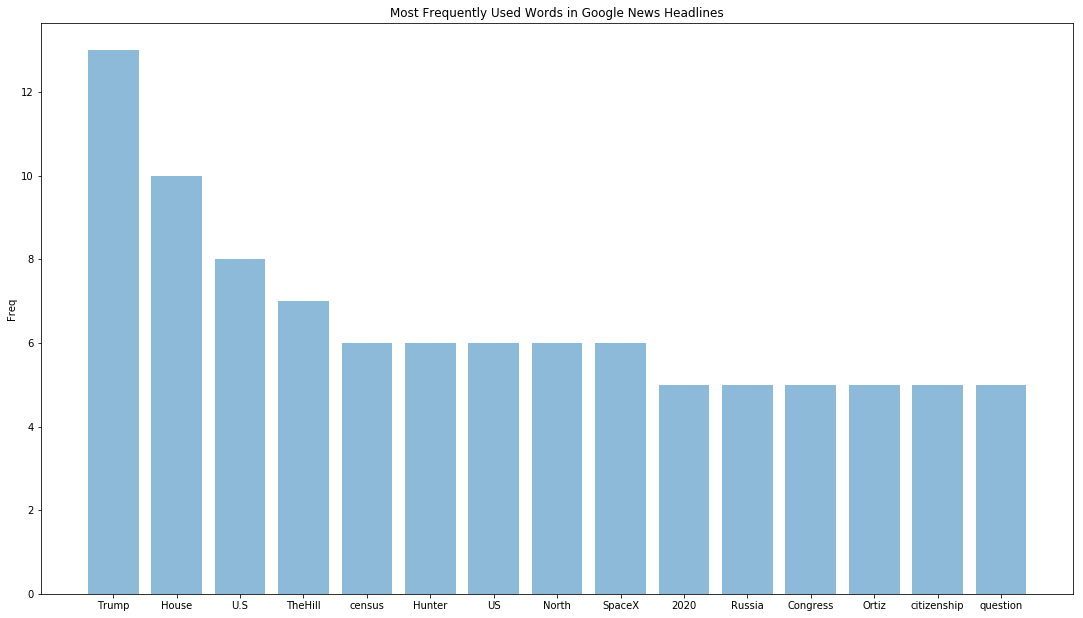

In [16]:
y_pos = np.arange(len(keywords))

plt.bar(y_pos, frequencies, align='center', alpha=0.5)
plt.xticks(y_pos, keywords)
plt.ylabel('Freq')
plt.title('Most Frequently Used Words in Google News Headlines')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.show()

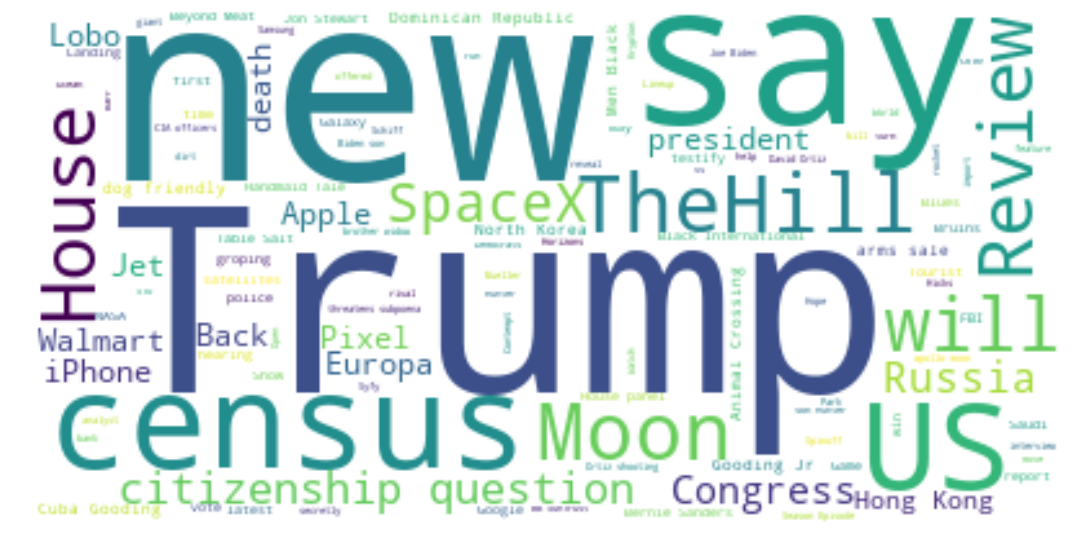

In [17]:
wc2 = WordCloud(background_color="white", max_words=2000,
                contour_width=3, contour_color='steelblue')
wc2.generate(search_text)
fig3 = plt.gcf()
fig3.set_size_inches(18.5, 10.5)
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

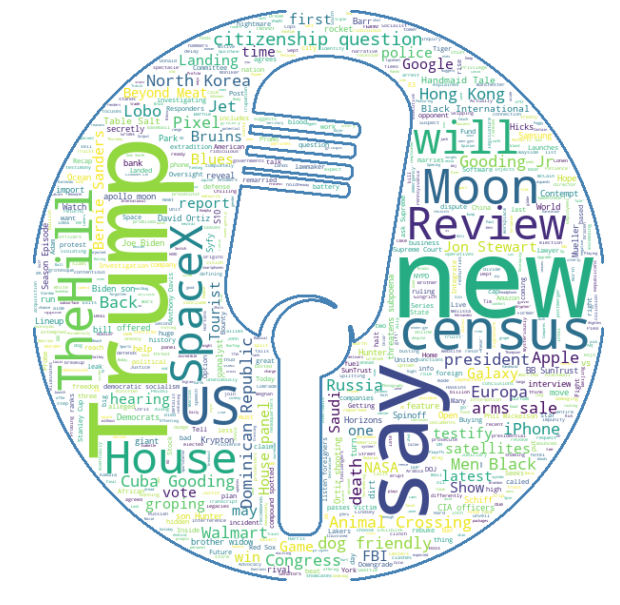

In [18]:
news_mask = np.array(Image.open(os.path.join(os.getcwd(), "microphone.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=news_mask,
               contour_width=3, contour_color='steelblue')

wc.generate(search_text)
wc.to_file(os.path.join(os.getcwd(), "news_wordcloud.png"))

fig2 = plt.gcf()
fig2.set_size_inches(10.5, 10.5)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
test_get_headlines()

In [20]:
test_print_headlines()

(0.) Headline 1
(1.) Headline 2
(2.) Headline 3


In [21]:
test_count_occurrences()

In [22]:
test_most_common_words()

In [23]:
test_text_to_word_bag()